In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
from collections import defaultdict
NUM_SUBSAMPLES = 10
from final_algo import get_batch, new_algo, anandkumar_algo
from paper_sims_util import (confusion, MCC,
                             grid_graph, star, their_random_graph_2,
                             attr_threshold, run_single_MTP)
import matplotlib.pyplot as plt

In [16]:
from paper_sims_util import chain, grid_graph, star, grid_3D

In [25]:
grid_3D(3)

array([[ 1.48404948, -0.36969503,  0.        , -0.36969503,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.36969503,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.36969503,  1.82763706, -0.36969503,  0.        , -0.4731047 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.4731047 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.36969503,  1.48404948,  0.        ,  0.        ,
        -0.36969503,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.36969503,  0.        ,  0.    

In [22]:
res = grid_3D(3)

In [6]:
np.linalg.inv(chain(5))

array([[1.    , 0.9   , 0.81  , 0.729 , 0.6561],
       [0.9   , 1.    , 0.9   , 0.81  , 0.729 ],
       [0.81  , 0.9   , 1.    , 0.9   , 0.81  ],
       [0.729 , 0.81  , 0.9   , 1.    , 0.9   ],
       [0.6561, 0.729 , 0.81  , 0.9   , 1.    ]])

In [8]:
 np.linalg.inv(grid_graph(2))

array([[1.        , 0.87136929, 0.87136929, 0.82987552],
       [0.87136929, 1.        , 0.82987552, 0.87136929],
       [0.87136929, 0.82987552, 1.        , 0.87136929],
       [0.82987552, 0.87136929, 0.87136929, 1.        ]])

In [23]:
from final_algo import stability_anandkumar

In [56]:
from final_algo import stability_wrapper, nsbel

In [57]:
nstab = stability_wrapper(nsbel)

In [76]:
nseb_res = nstab(X, [0.1, 0.4, 0.7, 0.9], 0.6)

Working on 0.1
Working on 0.4
Working on 0.7
Working on 0.9


In [77]:
MCC(nseb_res, omega)

0.3241488296571745

In [21]:
def stability_anandkumar(data, lambdas, pi):
    results, probs = stability_selection(anandkumar_algo, lambdas, data)
    res = get_edges(probs, lambdas, pi)
    n, p = data.shape
    omega = np.zeros((p,p))
    for e in res:
        omega[e] = 1
    return omega

In [13]:
def get_edges(probs, lambs, pi):
    first_key = list(probs.keys())[0]
    edges = list(probs[first_key].keys())
    edges_plot = defaultdict(list)
    for e in edges:
        for l in lambs:
            edges_plot[e].append(probs[l][e])
    true_edges = set()
    for e, pis in edges_plot.items():
        if max(pis) >= pi:
            true_edges.add(e)
    return true_edges

In [11]:
def generate_plot(probs, lambs):
    first_key = list(probs.keys())[0]
    edges = list(probs[first_key].keys())
    edges_plot = defaultdict(list)
    for e in edges:
        for l in lambs:
            edges_plot[e].append(probs[l][e])
    return edges_plot

In [10]:
def stability_selection(algo, regularization_params, data):
    N, p = data.shape
    edges = []
    for i in range(p):
        for j in range(i+1, p):
            edges.append((i,j))
    subN = N//2
    results = {}
    probs = {}
    for lamb in regularization_params:
        print('Working on', lamb)
        results[lamb] = []
        for _ in range(NUM_SUBSAMPLES):
            batch = get_batch(data, subN)
            res = algo(batch, **lamb)
            results[lamb].append(res)
        probs[lamb] = defaultdict(int)
        for res in results[lamb]:
            for e in edges:
                e_val = res[e]
                if e_val != 0.:
                    probs[lamb][e] += 1
        for e in edges:
            probs[lamb][e] /= len(results[lamb])
    return results, probs

In [50]:
p = 20
omega = their_random_graph_2(p, d=0.05)
sigma = np.linalg.inv(omega)
#N = int(np.power(p, 1))
N = 100
X = np.random.multivariate_normal(mean = np.zeros(p), cov = np.linalg.inv(omega), size = N)
anandkumar_algo_lambdas = [(0., 2), (0.01, 3), (0.5, 2)]
pi = 0.6

In [51]:
omega_hat = stability_anandkumar(X, anandkumar_algo_lambdas, pi)

Working on (0.0, 2)
Working on (0.01, 3)
Working on (0.5, 2)


In [42]:
res = new_algo(X, 7./9.)

Running new algorithm
N=100, M=35
Working on l = 0
Working on l = 1
Working on l = 2


In [48]:
MCC(res, omega)

0.8278985507246377

In [52]:
MCC(omega_hat, omega)

0

In [5]:
our_algo_lambdas = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7]
results, probs = stability_selection(new_algo, our_algo_lambdas, X)

Running new algorithm
N=50, M=48
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
Working on l = 4
Working on l = 5
Working on l = 6
Working on l = 7
Running new algorithm
N=50, M=48
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
Working on l = 4
Working on l = 5
Working on l = 6
Running new algorithm
N=50, M=48
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
Working on l = 4
Working on l = 5
Working on l = 6
Running new algorithm
N=50, M=48
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
Working on l = 4
Working on l = 5
Running new algorithm
N=50, M=48
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
Working on l = 4
Working on l = 5
Working on l = 6
Running new algorithm
N=50, M=48
Working on l = 0
Working on l = 1
Working on l = 2
Working on l = 3
Working on l = 4
Working on l = 5
Working on l = 6
Running new algorithm
N=50, M=48
Working on l = 0
Working on l = 1
Working on l = 2
Work

In [6]:
edges_plot = generate_plot(probs, our_algo_lambdas)

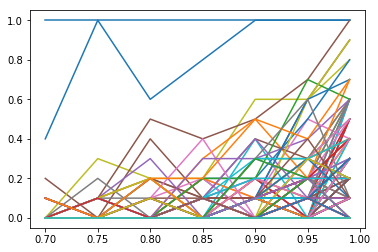

In [7]:
for e, probs in edges_plot.items():
    plt.plot(our_algo_lambdas,probs)
plt.show()

In [8]:
np.sqrt(np.log(p)/N)

0.17308183826022852

In [15]:
anandkumar_algo_lambdas = [0., 0.01, 0.5] #[0., 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]

In [16]:
results, probs = stability_selection(anandkumar_algo, anandkumar_algo_lambdas, X)

Working on 0.0
Working on 0.01
Working on 0.5


In [17]:
edges_plot = generate_plot(probs, anandkumar_algo_lambdas)

In [18]:
true_edges = get_edges(probs, anandkumar_algo_lambdas, 0.6)

In [19]:
print(true_edges)

{(6, 9), (14, 17), (10, 17), (7, 12), (1, 17), (0, 7), (13, 17), (1, 6), (0, 10), (18, 19), (3, 7), (2, 5), (1, 11), (5, 8), (6, 7), (4, 19), (6, 10), (5, 18), (14, 18), (10, 18), (0, 17), (7, 19), (12, 17), (0, 4), (8, 15), (4, 10), (2, 6), (9, 14), (5, 11), (4, 5), (10, 13), (4, 16), (9, 16), (14, 15), (16, 19), (2, 17), (0, 1), (17, 18), (3, 12), (1, 12), (8, 12), (4, 15), (2, 11), (5, 14), (3, 18), (10, 14), (8, 18), (6, 13), (11, 15), (9, 19), (7, 8), (6, 16), (15, 16), (11, 16), (2, 18), (0, 14), (3, 11), (1, 15), (8, 9), (4, 12), (2, 12), (3, 17), (6, 14), (7, 15), (12, 13), (1, 16), (13, 16), (1, 5), (0, 11), (3, 6), (1, 10), (6, 11), (5, 17), (14, 19), (10, 19), (0, 18), (7, 18), (12, 18), (1, 19), (0, 5), (13, 19), (0, 8), (4, 11), (3, 5), (2, 7), (9, 13), (5, 10), (4, 6), (5, 7), (4, 17), (7, 17), (0, 2), (3, 15), (1, 3), (8, 13), (4, 8), (2, 8), (5, 13), (10, 15), (8, 19), (11, 14), (9, 18), (7, 11), (6, 17), (15, 19), (11, 19), (16, 17), (2, 19), (0, 15), (3, 10), (1, 14),

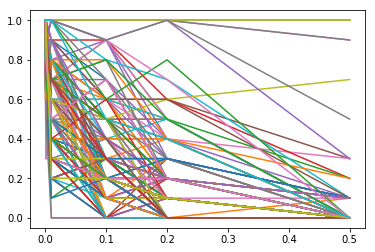

In [16]:
for e, probs in edges_plot.items():
    plt.plot(anandkumar_algo_lambdas,probs)
plt.show()